<a href="https://colab.research.google.com/github/jess22jess/EDP/blob/main/Series_de_Fourier_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                       2           
           d          d            
λ⋅f(x) + 2⋅──(f(x)) + ───(f(x)) = 0
           dx           2          
                      dx           

      ⎛  _______    ⎞          ⎛  _______    ⎞
    x⋅⎝╲╱ 1 - λ  - 1⎠       -x⋅⎝╲╱ 1 - λ  + 1⎠
C₁⋅ℯ                  + C₂⋅ℯ                  

⎡                   _______               _______        ⎤
⎢                 ╲╱ 1 - λ  - 1       - ╲╱ 1 - λ  - 1    ⎥
⎣C₁ + C₂ = 0, C₁⋅ℯ              + C₂⋅ℯ                = 0⎦

⎡    _______        _______    ⎤
⎣- ╲╱ 1 - λ  - 1, ╲╱ 1 - λ  - 1⎦

C₁ + C₂ = 0

        _______             _______        
    - ╲╱ 1 - λ  - 1       ╲╱ 1 - λ  - 1    
C₁⋅ℯ                + C₂⋅ℯ              = 0

               ⎛     _______    ⎞      _______    
               ⎜ 2⋅╲╱ 1 - λ     ⎟  - ╲╱ 1 - λ  - 1
Determinante = ⎝ℯ            - 1⎠⋅ℯ               

⎛                       2       ⎞     
⎜           d          d        ⎟  2⋅x
⎜λ⋅f(x) + 2⋅──(f(x)) + ───(f(x))⎟⋅ℯ   
⎜           dx           2      ⎟     
⎝                      dx       ⎠     

       ⎛        n⎞
     2⋅⎝1 - (-1) ⎠
aₙ = ─────────────
          π⋅n     

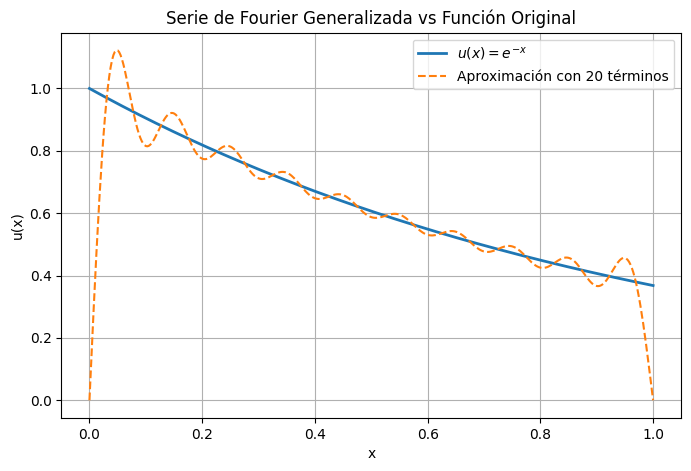

In [4]:
# =============================================
# Problema de Sturm-Liouville y Series de Fourier Generalizadas
# =============================================

import sympy as sp
import matplotlib.pyplot as plt

# Configuramos SymPy para impresión bonita
sp.init_printing()

# Definimos símbolos y la ecuación diferencial

x, lam = sp.symbols('x lambda', real=True)
f = sp.Function('f')(x)

# EDO: f''(x) + 2f'(x) + lambda*f(x) = 0
ode = sp.Eq(f.diff(x, 2) + 2*f.diff(x) + lam*f, 0)
display(ode)

# Resolvemos la EDO

sol = sp.dsolve(ode, f)
f_general = sol.rhs
display(f_general)


# Aplicamos condiciones de frontera f(0)=0, f(1)=0

C1, C2 = sp.symbols('C1 C2')
f_0 = f_general.subs({x: 0})
f_1 = f_general.subs({x: 1})

# Creamos el sistema
conds = [sp.Eq(f_0, 0), sp.Eq(f_1, 0)]
display(conds)

# Resolver sistema (nos interesa saber si tiene solución no trivial)
# Primero buscamos raíces de la ecuación característica
r = sp.symbols('r')
char_eq = sp.Eq(r**2 + 2*r + lam, 0)
r_sol = sp.solve(char_eq, r)
display(r_sol)

# Redefinimos solución general usando raíces r1 y r2
r1, r2 = r_sol
f_gen = C1 * sp.exp(r1 * x) + C2 * sp.exp(r2 * x)

# Aplicamos condiciones f(0)=0, f(1)=0
eq1 = sp.Eq(f_gen.subs(x, 0), 0)
eq2 = sp.Eq(f_gen.subs(x, 1), 0)
display(eq1, eq2)

# Matriz de coeficientes
M = sp.Matrix([
    [sp.exp(r1 * 0), sp.exp(r2 * 0)],
    [sp.exp(r1 * 1), sp.exp(r2 * 1)]
])
detM = sp.simplify(M.det())
display(sp.Eq(sp.Symbol('Determinante'), detM))

#  Verificación de forma Sturm–Liouville
# Multiplicamos por e^{2x} para que tome forma:
# (p(x)f')' + λr(x)f = 0
p = sp.exp(2*x)
r_w = sp.exp(2*x)
lhs = sp.simplify(sp.diff(p * f.diff(x), x) + lam * r_w * f)
display(lhs)

# Confirmamos que es forma Sturm–Liouville:
# p(x) = e^{2x},  r(x) = e^{2x}, q(x) = 0

#  Serie de Fourier generalizada de u(x) = e^{-x}
# Usamos las autofunciones para proyectar u(x)

n = sp.symbols('n', integer=True, positive=True)
u = sp.exp(-x)

# Supongamos autofunciones tipo: φ_n(x) = e^{-x} * sin(nπx)
phi_n = sp.exp(-x) * sp.sin(n * sp.pi * x)
r_w = sp.exp(2*x)

# Producto interior <u, φ_n> / <φ_n, φ_n>
numerador = sp.integrate(u * phi_n * r_w, (x, 0, 1))
denominador = sp.integrate(phi_n**2 * r_w, (x, 0, 1))
a_n = sp.simplify(numerador / denominador)

display(sp.Eq(sp.Symbol('a_n'), a_n))

# Serie de Fourier generalizada:
# u(x) ≈ Σ a_n * φ_n(x)
# φ_n(x) = e^{-x} * sin(nπx)
# Graficamos u(x) y su aproximación con la serie

import numpy as np

# Convertimos funciones simbólicas a funciones numéricas
u_func = sp.lambdify(x, u, modules='numpy')

# Aproximación de la serie de Fourier generalizada (usamos los primeros N términos)
N = 20  # puedes aumentar N para mejor aproximación
x_vals = np.linspace(0, 1, 400)
approx_vals = np.zeros_like(x_vals)

for k in range(1, N + 1):
    phi_k = sp.exp(-x) * sp.sin(k * sp.pi * x)
    num_k = sp.integrate(u * phi_k * r_w, (x, 0, 1))
    den_k = sp.integrate(phi_k**2 * r_w, (x, 0, 1))
    a_k = sp.simplify(num_k / den_k)
    phi_k_func = sp.lambdify(x, phi_k, modules='numpy')
    approx_vals += float(a_k) * phi_k_func(x_vals)

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(x_vals, u_func(x_vals), label=r'$u(x) = e^{-x}$', linewidth=2)
plt.plot(x_vals, approx_vals, label=fr'Aproximación con {N} términos', linestyle='--')
plt.title('Serie de Fourier Generalizada vs Función Original')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

